<div align="center"><font size="6">Data Visualization with Matplotlib</font></div>


Matplotlib is the "standard" Python data visualization library.
It was originally conceived to provide an alternative to Matlab, and some of its syntax derived from that.  In recent years, it has begun to show its age, and other packages that build on it provide cleaner, more modern APIs.
For example, [seaborn](https://seaborn.pydata.org/), [bokeh](https://bokeh.org/), [plotly](https://plotly.com/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and [pandas](https://pandas.pydata.org/) can be used as wrappers for Matplotlib.
However, it is still a good place to start.

Note also that while this notebook is primarily about the mechanics of plotting, it also reviews some key ideas, including

* normal versus uniform random variables,
* angles between random vectors in $d$ dimensions, and
* 3d scatterplots.

# Getting Started

We will import `matplotlib` using the standard abbreviation `plt`.  Let's also import `numpy`.  You will be typing these two lines of python code a lot this semester.  Eventually you will be able to type them with your eyes closed!

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

There are several ways to use `matplotlib`, and the `pyplot` API is the one we will most generally use.

To control how Matplotlib displays figures in a Jupyter notebook use the ``%matplotlib`` magic command.  The argument to this command chooses which Matplotlib backend to use.
We will generally use it as ``%matplotlib inline`` which generates static images that are embedded in the notebook.  This is the default behavior, so if that is what you want, there is nothing you need to do.
The other relevant option for Jupyter notebooks is ``%matplotlib notebook`` which will generate *interactive* plots.

In [ ]:
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

We are now ready to generate our first plot.  Let's plot two curves, $\sin(x)$ and $\cos(x)$.  

First we need a bunch of $x$ values, as a `numpy` array.  We can then pass all of these values through the `np.sin` and `np.cos` functions.

In [ ]:
xs = np.linspace(0, 10, 1000)
xs

NameError: name 'np' is not defined

In [ ]:
sinx = np.sin(xs)
cosx = np.cos(xs)
xs.shape, sinx.shape, cosx.shape

((1000,), (1000,), (1000,))

Now for the fun.  Let's draw a picture!

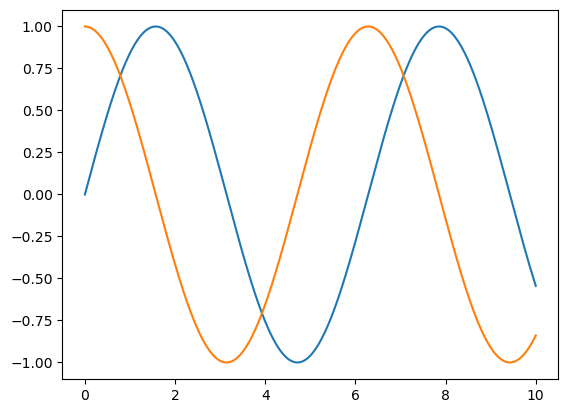

In [ ]:
plt.plot(xs, sinx)
plt.plot(xs, cosx)

Being the excellent data scientists that we are, we will always include labels for the $x$ and $y$ axes and for each curve in a plot!

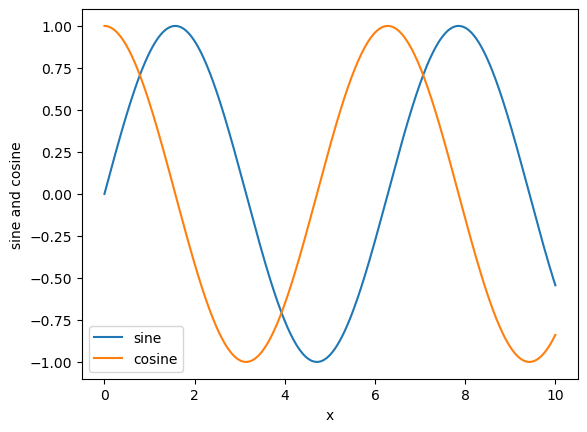

In [ ]:
plt.plot(xs, sinx, label='sine')
plt.plot(xs, cosx, label='cosine')
plt.xlabel('x')
plt.ylabel('sine and cosine')
plt.legend()

And, ta-da, we can even use latex to format our labels!

Text(0.5, 1.0, 'Fun with Sine and Cosine')

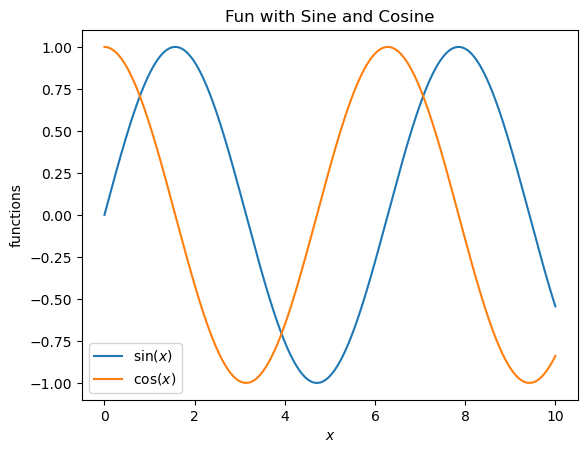

In [ ]:
plt.plot(xs, sinx, label='$\sin(x)$')
plt.plot(xs, cosx, label='$\cos(x)$')
plt.xlabel('$x$')
plt.ylabel('functions')
plt.legend()

plt.title('Fun with Sine and Cosine')

As you gain experience with `numpy` and `matplotlib` you will write more concise code, which is almost as easy to read.

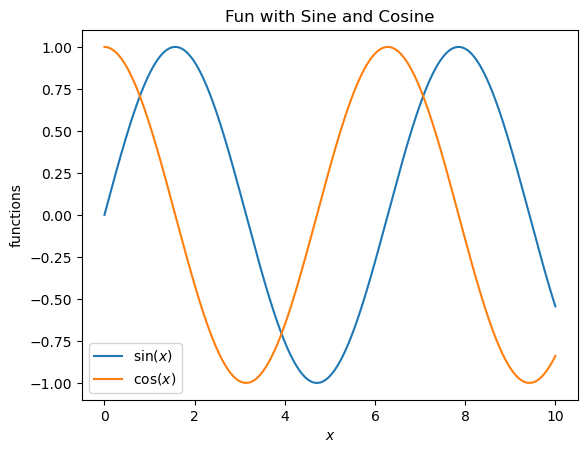

In [ ]:
xs = np.linspace(0, 10, 1000)
plt.plot(xs, np.sin(xs), label='$\sin(x)$')
plt.plot(xs, np.cos(xs), label='$\cos(x)$')
plt.xlabel('$x$')
plt.ylabel('functions')
plt.legend()

plt.title('Fun with Sine and Cosine');  # <- what changed when we add this semicolon?

We can specify different styles, colors, thicknesses, and other aspects of the curves.

In [ ]:
plt.plot?

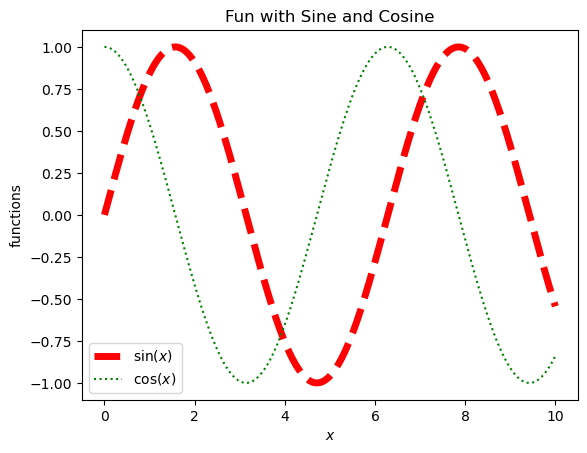

In [ ]:
xs = np.linspace(0, 10, 1000)
plt.plot(xs, np.sin(xs), linestyle='dashed', color='red', linewidth=5, label='$\sin(x)$')
plt.plot(xs, np.cos(xs), linestyle='dotted', color='green', label='$\cos(x)$')
plt.xlabel('$x$')
plt.ylabel('functions')
plt.legend()

plt.title('Fun with Sine and Cosine');  # <- what changed when we add this semicolon?

The [`matplotlib` gallery](https://matplotlib.org/stable/gallery/index.html) is a useful resource for finding out how to make the plot you want.

# Saving to a file

You can save your `matplotlib` figure to a file using the `savefig()` command.
The extension used will determine the format.

In [ ]:
plt.savefig('my_figure.png')

<Figure size 640x480 with 0 Axes>

We now have a file called ``my_figure.png`` in the current working directory:

In [ ]:
!ls -lh my_figure.png

-rw------- 1 anderson fac 2.4K Jan 27 14:10 my_figure.png


In [ ]:
plt.savefig('my_figure.jpg')

<Figure size 640x480 with 0 Axes>

In [ ]:
!ls -lh *png *jpg

-rw------- 1 anderson fac 5.3K Jan 27 14:10 my_figure.jpg
-rw------- 1 anderson fac 2.4K Jan 27 14:10 my_figure.png


# The two interfaces of Matplotlib 

A potentially confusing feature of `matplotlib` is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface.

### The MATLAB-style Interface

The MATLAB-style API is contained in the pyplot (``plt``) module.
For example, the following code will probably look quite familiar to MATLAB users.

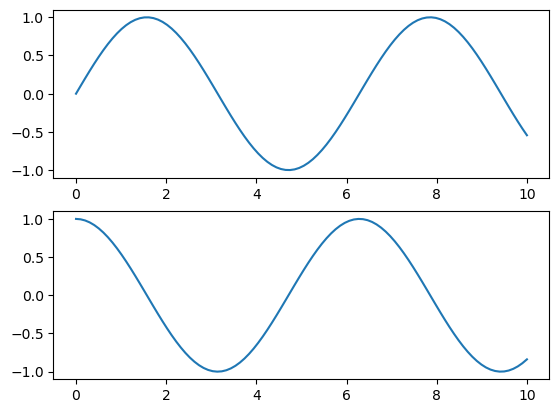

In [ ]:
xs = np.linspace(0, 10, 100)

# Create first of two axes stacked vertically.

plt.subplot(2, 1, 1) # (rows, columns, axis number)
plt.plot(xs, np.sin(xs))

# Create second axis.

plt.subplot(2, 1, 2)
plt.plot(xs, np.cos(xs));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axis).

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axis, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
For example:

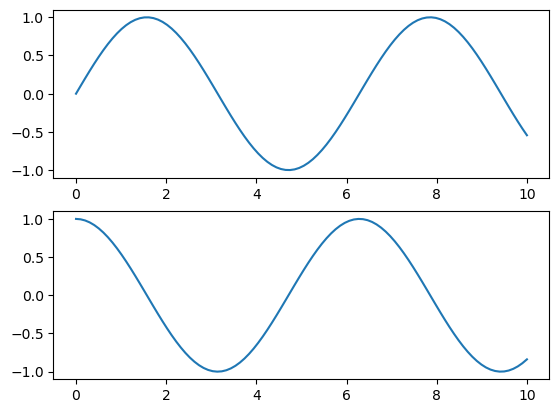

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects

fig, ax = plt.subplots(2)

# Call plot() method on the appropriate Axes object

ax[0].plot(xs, np.sin(xs))
ax[1].plot(xs, np.cos(xs));

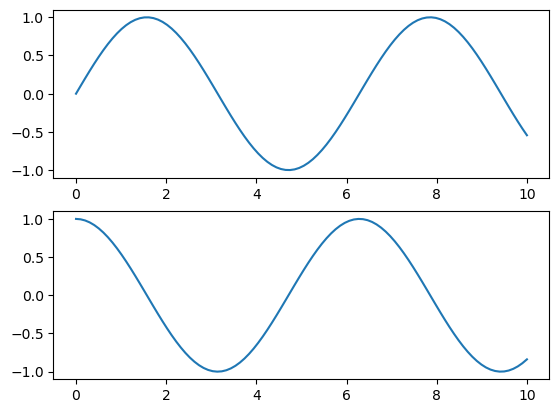

In [ ]:
fig

In [ ]:
ax

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

Throughout this course, we will switch between the two interfaces, depending on what is most convenient.

# Scatter plots

Scatter plots are one of our "bread-and-butter" methods for visualizing data in two dimensions.

In [ ]:
data_1 = np.random.uniform(-0.5, 1, size=(50, 2))
data_2 = np.random.uniform(-1, 0.5, size=(50, 2))

X = np.vstack((data_1, data_2))
T = np.array([0] * 50 + [1] * 50).reshape(-1, 1)  # target labels

X.shape, T.shape

((100, 2), (100, 1))

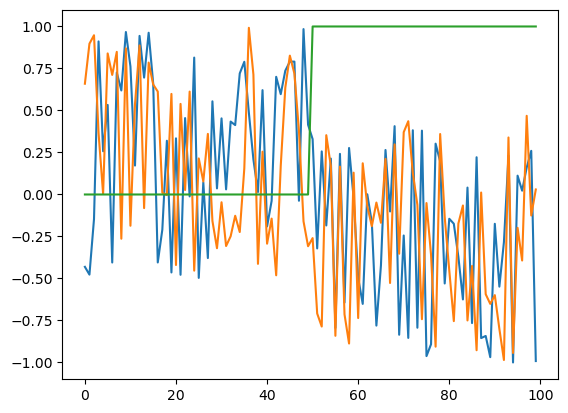

In [ ]:
plt.plot(X)
plt.plot(T)

Uh oh.  Confusing.  We had better at least add a legend telling us what each curve is.

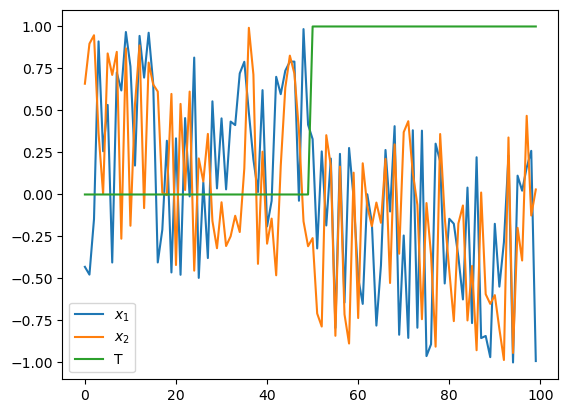

In [ ]:
plt.plot(X, label=('$x_1$', '$x_2$'))
plt.plot(T, label='T')
plt.legend();

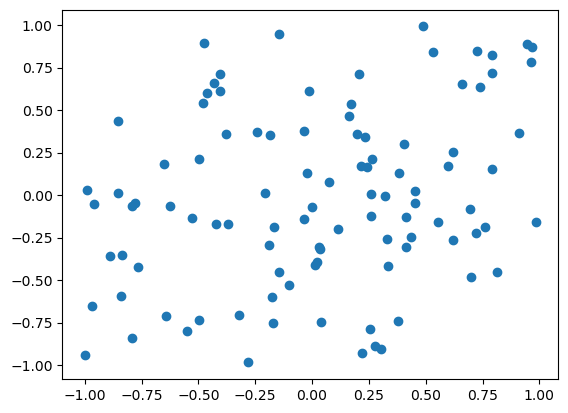

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);

It is very helpful to color our dots according to which distribution each data sample came from.  Check out the documentation for `plt.scatter` to learn about the argument names.

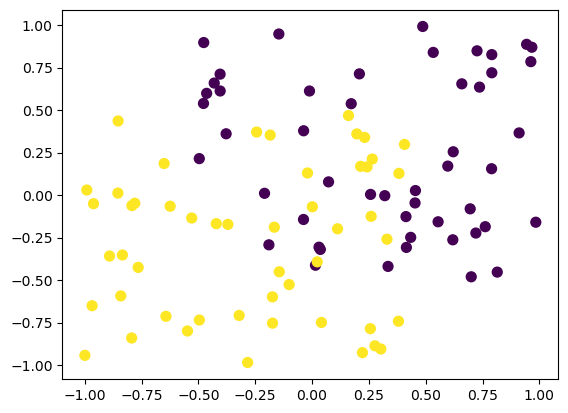

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=T, s=50);

The `s` parameter controls the size of the markers, and like the color parameter, `c`, it can be an array of values.
We can achieve a similar result using `plt.plot`.  However, it does not have the same level of flexibility and it produces markers that are all the same color and size.

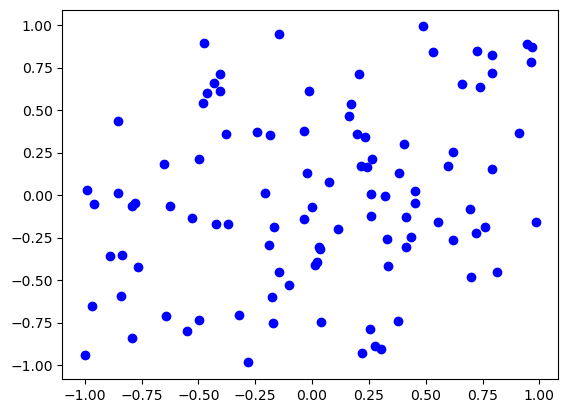

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'ob');  # o for large dots, and b for color blue

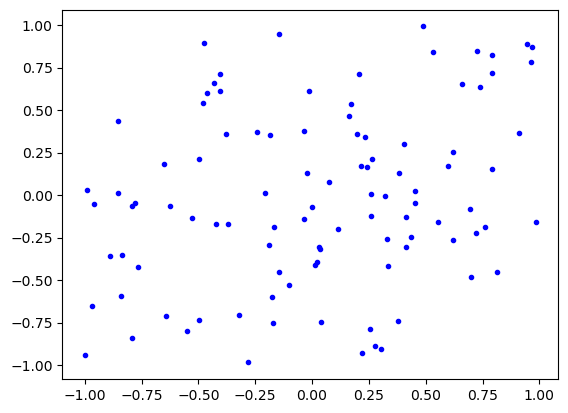

In [ ]:
plt.plot(X[:, 0], X[:, 1], '.b');  # . for small dots, and b for color blue

# Histograms

As an example we will generate two datasets from a normal distribution and plot their histograms, showing some features of `matplotlib`'s `hist` function.  The `normed` flag normalizes the bin heights such that it represents a probability distribution, meaning the sum of all values equals 1.


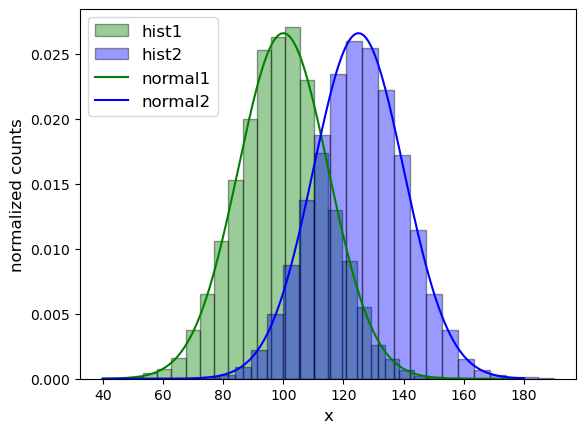

In [ ]:
sample_size = 10000
mu_1 = 100
mu_2 = 125
sigma_1 = sigma_2 = 15

x1 = mu_1 + sigma_1 *np.random.randn(sample_size)
x2 = mu_2 + sigma_2 * np.random.randn(sample_size)

# Can instead call np.random.normal
# x1 = np.random.normal(mu_1, sigma_1, sample_size)
# x2 = np.random.normal(mu_2, sigma_2, sample_size)

num_bins = 25

plt.hist(x1, num_bins, density=True, facecolor='green', alpha=0.4, # what is alpha doing?
         edgecolor = 'black', label='hist1')
plt.hist(x2, num_bins, density=True, facecolor='blue', alpha=0.4, 
         edgecolor = 'black', label='hist2')

plt.xlabel('x', fontsize=12)
plt.ylabel('normalized counts', fontsize=12)

def normal_f(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

xs = np.linspace(40, 180, 1000)
plt.plot(xs, normal_f(xs, mu_1, sigma_1), '-g', label='normal1')
plt.plot(xs, normal_f(xs, mu_2, sigma_2), '-b', label='normal2')

plt.legend(loc='upper left', fontsize='12');

# More About Color

Let's take a closer look at specifying colors and color maps.  We will use scatter plots as an example.

What if you want to control the color choice?  It becomes important to establish the mapping from the labels `T` to the color used for display.

In [ ]:
np.random.multivariate_normal([1,1], [[1,0],[0,1]], size=(5))

array([[ 0.79745715,  0.2702341 ],
       [ 0.63763563, -0.19029918],
       [ 1.41098813,  0.01422746],
       [ 2.28370924,  3.31586779],
       [ 0.2690826 ,  0.88386531]])

In [ ]:
[1]*5

[1, 1, 1, 1, 1]

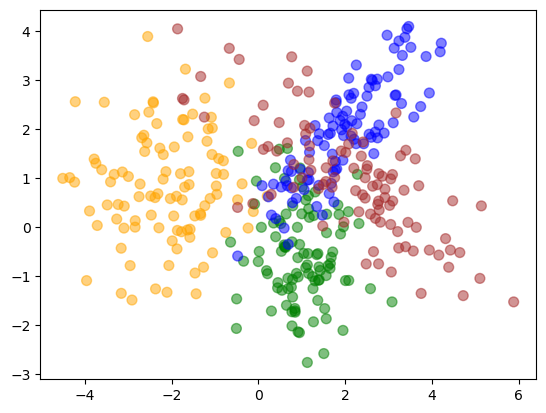

In [ ]:
class_colors = ['orange', 'green', 'blue', 'brown']
n_samples_each_class = 100
class_means = [[-2, 1], [1, -0.5], [2, 2], [2, 1]]
class_covariances = [
    [[1, 0], [0, 1]],
    [[0.5, 0], [0, 1]],
    [[1, 0.8], [0.8, 1]],
    [[3, -2], [-2, 2]]]

X = []
T = []
class_i = 0
for mean, covariance in zip(class_means, class_covariances):
    X.append(np.random.multivariate_normal(mean, covariance, n_samples_each_class))
    T.append([class_i] * n_samples_each_class)
    class_i += 1
    
X = np.vstack(X)
T = np.hstack(T)

plt.scatter(X[:, 0], X[:, 1], c=[class_colors[label] for label in T], alpha=0.5, s=50);

# Angles Between Random Vectors

This is a nice example going back to the previous lecture on dot products and looking at an interesting aspect of increasing the dimensionality of a feature space.  In particular, pick any two random vectors and compute the angle between them. Do this many times and generate a sample probability density (more on that terminology in lecture).  Then show this density using a histogram and repeated for different numbers of dimensions, representing different features.




In [ ]:
v = np.array([1, 2, 3])
v / np.linalg.norm(v), v / np.sqrt(np.sum(v ** 2))

(array([0.26726124, 0.53452248, 0.80178373]),
 array([0.26726124, 0.53452248, 0.80178373]))

In [ ]:
10000, 10_000

(10000, 10000)

0.02222499999999995

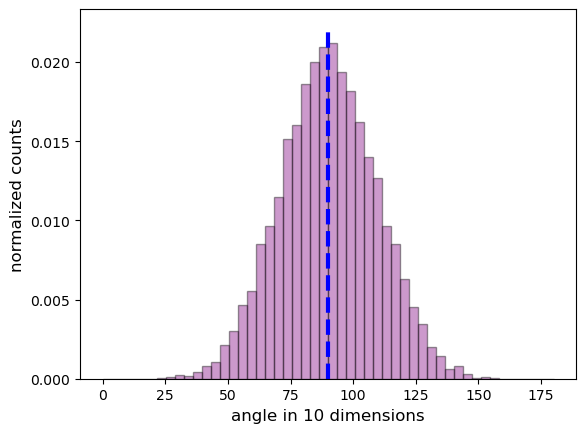

In [ ]:
n_features = 10
n_samples = 10_000

def make_random_unit_length_vector(dim):
    v = np.random.uniform(-1.0, 1.0, dim)
    v_length = np.sqrt(np.sum(v ** 2))   # or  np.linalg.norm(v)
    return v / v_length 

def sample_angle(dim):
    a = make_random_unit_length_vector(dim)
    b = make_random_unit_length_vector(dim)
    theta_radians = np.arccos(a @ b)
    theta_degrees = np.degrees(theta_radians)
    return theta_degrees

angles = np.array([sample_angle(n_features) for i in range(n_samples)])

num_bins = 50
plt.hist(angles, num_bins, density=True, facecolor='purple', alpha=0.4, 
         edgecolor = 'black', label='angles', range=[0, 180])
plt.xlabel(f'angle in {n_features} dimensions', fontsize=12)
# plt.xlabel('angle in ' + str(num_features) + ' dimensions', fontsize=12)
plt.ylabel('normalized counts', fontsize=12)

ymax = plt.ylim()[1]
plt.plot([90, 90], [0, ymax], '--b', lw=3)
ymax

Try changing the assignment to `n_features` and rerun.

A better way is to put the above code in a for loop to try a variety of values for `n_features`. This is a common workflow as you develop and test parts of new algorithms.

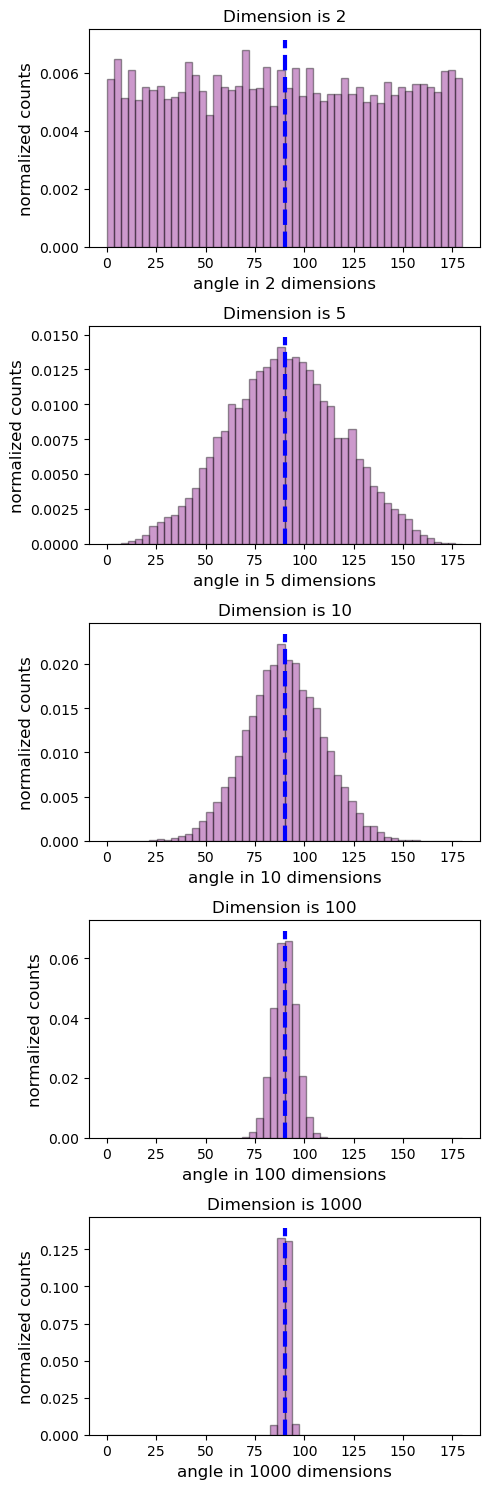

In [ ]:
def show_histogram(n_features):
    n_samples = 10_000

    def make_random_unit_length_vector(dim):
        v = np.random.uniform(-1.0, 1.0, dim)
        v_length = np.sqrt(np.sum(v ** 2))   # or  np.linalg.norm(v)
        return v / v_length 

    def sample_angle(dim):
        a = make_random_unit_length_vector(dim)
        b = make_random_unit_length_vector(dim)
        theta_radians = np.arccos(a @ b)
        theta_degrees = np.degrees(theta_radians)
        return theta_degrees

    angles = np.array([sample_angle(n_features) for i in range(n_samples)])

    num_bins = 50
    plt.hist(angles, num_bins, density=True, facecolor='purple', alpha=0.4, 
             edgecolor = 'black', label='angles', range=[0, 180])
    plt.xlabel(f'angle in {n_features} dimensions', fontsize=12)
    plt.ylabel('normalized counts', fontsize=12)

    ymax = plt.ylim()[1]
    plt.plot([90, 90], [0, ymax], '--b', lw=3)    
    
plt.figure(figsize=(5, 15))
n_features_list = [2, 5, 10, 100, 1000]
ploti = 0
for nf in n_features_list:
    ploti += 1
    plt.subplot(len(n_features_list), 1, ploti)
    show_histogram(nf)
    plt.title(f'Dimension is {nf}')
    
plt.tight_layout()

Now we can make an observation......what do you see?

# 3D Scatter Plot

When working with high dimensional data the limitation of a 2D display is deeply frurstrating, not to mention our own perceptual limitations. Images we view are 2D.  

Can we plot 3D data in 3D?  Yes!

Let's make a function to generate our data, using the code we used above to make scatterplot data.

I beg your pardon for diving deep into linear algebra here, but we must guarantee that our covariance matrics are [symmetric and positive semi-definite](https://stats.stackexchange.com/questions/52976/is-a-sample-covariance-matrix-always-symmetric-and-positive-definite)!

In [ ]:
def convert_to_psd(A):
    A = np.array(A)
    C = (A + A.T) / 2
    eigval, eigvec = np.linalg.eig(C)
    eigval[eigval < 0] = 0
    return eigvec @ np.diag(eigval) @ eigvec.T
    # return eigvec.dot(np.diag(eigval)).dot(eigvec.T)

In [ ]:
def make_data(means, covariances, n_samples_each_class):
    X = []
    T = []
    class_i = 0
    for mean, covariance in zip(class_means, class_covariances):
        covariance = convert_to_psd(covariance)
        X.append(np.random.multivariate_normal(mean, covariance, n_samples_each_class))
        T.append([class_i] * n_samples_each_class)
        class_i += 1

    X = np.vstack(X)
    T = np.hstack(T)
    
    return X, T

In [ ]:
class_colors = ['orange', 'green', 'blue', 'brown']
n_samples_each_class = 100
class_means = [[-2, 1, 2], [1, -0.5, 1], [2, 2, -1], [2, 1, -2]]
class_covariances = [
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
    [[0.5, 0, 0], [0, 1, 0], [0, 0, 2]],
    [[1, 0.8, 0], [0.8, 1, 0], [0, 0, 1]],
    [[3, -2, 1], [-2, 2, 1], [1, 1, 2]]]

In [ ]:
X, T = make_data(class_means, class_covariances, n_samples_each_class)

<IPython.core.display.Javascript object>


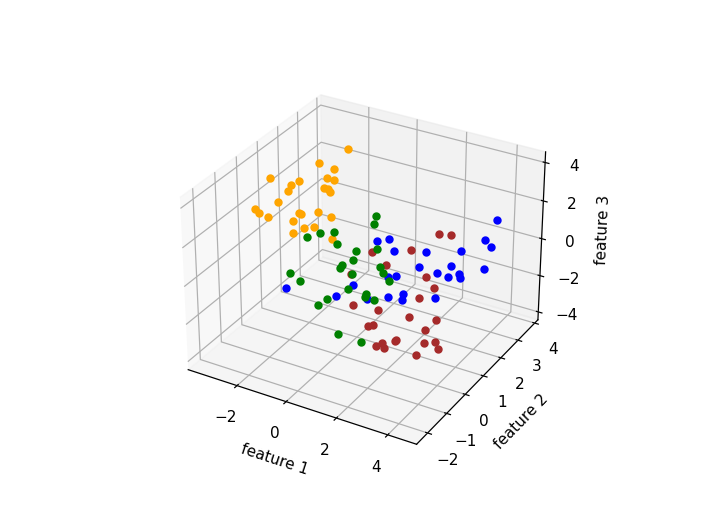

In [ ]:
%matplotlib notebook

class_colors = ['orange', 'green', 'blue', 'brown']
n_samples_each_class = 25

X, T = make_data(class_means, class_covariances, n_samples_each_class)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for Xi, Ti in zip(X, T):
    ax.scatter(Xi[0], Xi[1], Xi[2], c=class_colors[Ti])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3');

The package `sklearn` includes many functions and classes than can be useful to a data scientist and for machine learning applications.  See the [sklearn documentation](https://scikit-learn.org/stable/).  Here we will use its `make_classification` function.

<IPython.core.display.Javascript object>


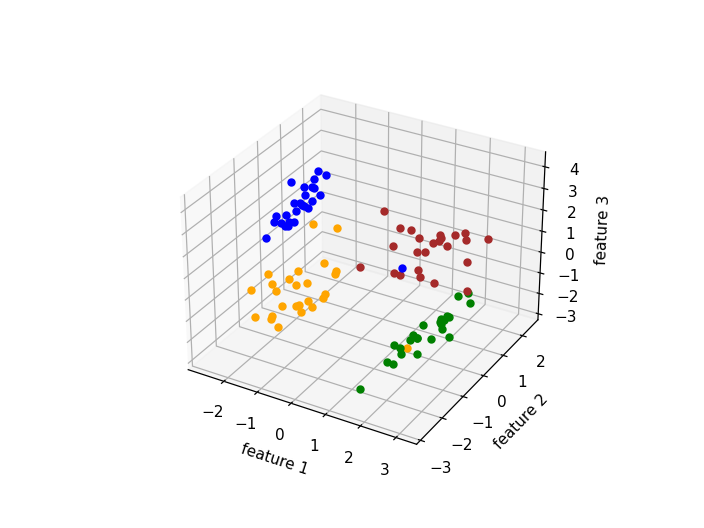

In [ ]:
from sklearn.datasets import make_classification

my_colors = ['orange', 'green', 'blue', 'brown'] 
n_samples = 100
n_features = 3
n_classes = 4

class_separation = 2.0
X, T = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=n_classes, 
                          n_clusters_per_class=1, class_sep=class_separation,
                          random_state=1)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(T)) :
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=my_colors[T[i]])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3');

During CS345, we will focus more on how to implement the algorithms using `numpy`, rather than relying on the predefined functions in `sklearn`.  This way you will gain a better understanding of the underlying algorithms.

# Animations

In [ ]:
import IPython.display as ipd  # for display and clear_output
import time  # for sleep

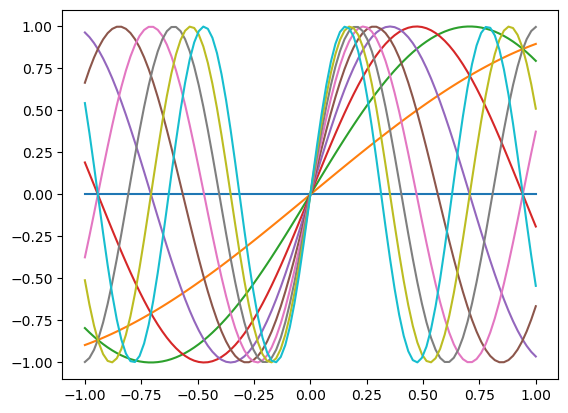

In [ ]:
%matplotlib inline

fig = plt.figure()

xs = np.linspace(-1, 1, 100)
for f in np.linspace(0, 10, 10):
    
    #plt.clf()
    plt.plot(xs, np.sin(f * xs))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
    time.sleep(0.2)  # 0.2 seconds
ipd.clear_output(wait=True)

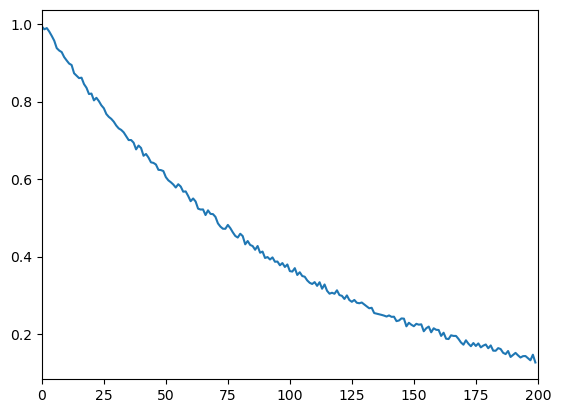

In [ ]:
fig = plt.figure()

error = []
for i in range(200):
    plt.clf()
   
    this_error = np.exp(-(i * 0.01)) + np.random.uniform(-0.01, 0.01)
    error.append(this_error)   
    plt.plot(error)
    plt.xlim(0, 200)
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
    time.sleep(0.01)
ipd.clear_output(wait=True)

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University. Authors include Asa Ben-Hur, Ross Beveridge, and Chuck Anderson.*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*